In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train= pd.read_csv(r"C:\Users\sonik\Downloads\poker\poker-hand-training.csv")
test= pd.read_csv(r"C:\Users\sonik\Downloads\poker\poker-hand-testing.csv")

In [3]:
test.head()

,Suit of Card 1,Rank of Card 1,Suit of Card 2,Rank of Card 2,Suit of Card 3,Rank of Card 3,Suit of Card 4,Rank of Card 4,Suit of Card 5,Rank of Card 5,Poker Hand
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [4]:
train.columns= ['s1','r1','s2','r2','s3','r3','s4','r4','s5','r5','hand']
test.columns= ['s1','r1','s2','r2','s3','r3','s4','r4','s5','r5','hand']

In [5]:
train.dtypes

s1      int64
r1      int64
s2      int64
r2      int64
s3      int64
r3      int64
s4      int64
r4      int64
s5      int64
r5      int64
hand    int64
dtype: object

<AxesSubplot:xlabel='hand', ylabel='Count'>

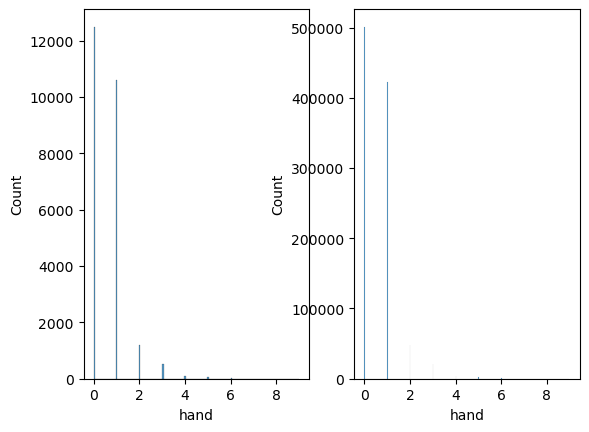

In [6]:
ax1=plt.subplot(121)
sns.histplot(data=train, x='hand', ax=ax1)
ax2=plt.subplot(122)
sns.histplot(data=test, x='hand', ax=ax2)

In [7]:
train['hand'].unique()

array([9, 8, 1, 0, 4, 3, 2, 5, 6, 7], dtype=int64)

In [8]:
len(train)

25010

In [9]:
def flush(row):
    if row['s1']==row['s2']==row['s3']==row['s4']==row['s5']:
        return 1
    else:
        return 0

In [10]:
def royal(row):
    r=[]
    for i in range(0,5):
        r.append(row['r'+str(i+1)])
    r.sort()
    return_val=0
    if r[0]==1:
        for i in range(1,5):
            if r[i]==9+i:
                return_val=1            
            else:
                break         
    return return_val

In [11]:
def straight(row):
    r=[]
    for i in range(0,5):
        r.append(row['r'+str(i+1)])
    r.sort()
    
    return_val=1
    for i in range(0,4):
        if r[i]==r[i+1]-1:
            pass
        else:
            return_val = 0
            break
    return return_val

In [20]:
def pairs(row):
    r=[]
    for i in range(0,5):
        r.append(row['r'+str(i+1)])
    r.sort()
    rr=pd.Series(r)
    return_val=0
    if rr.nunique()<5:
        if rr.nunique()==4:
            return_val = 1
        elif rr.nunique()==3:
            if 3 in rr.value_counts().values:
                return_val=3
            elif 2 in rr.value_counts().values:
                return_val=2
        elif rr.nunique()==2:
            if 4 in rr.value_counts().values:
                return_val=4
            elif 2 in rr.value_counts().values:
                return_val=6
    else:
            return_val=0
                 
                
    return return_val

In [21]:
def check_hand(row):
    return_val=0   
    if pairs(row)!=0:
        return pairs(row)
    elif flush(row)==1:
        if royal(row)==1:
            return_val=9
        elif straight(row)==1:
            return_val=8
        else:
            return_val=5
    else:
        if straight(row)==1:
            return_val=6
        else:
            return_val=0
    return return_val

In [27]:
t=train.iloc[10,:]
print(check_hand(t))
series=[t['s1'],t['s2'],t['s3'],t['s4'],t['s5']]
ranks=[t['r1'],t['r2'],t['r3'],t['r4'],t['r5']]
ranks.sort()
print(series)
print(ranks)

1
[1, 2, 3, 1, 2]
[1, 1, 3, 5, 9]


In [23]:
def extract_card(row):
    details={}
    keys=['s1','r1','s2','r2','s3','r3','s4','r4','s5','r5']
    for i in range(0,10):
        details[keys[i]]=row[i]
        
    return details

In [30]:
for i in range(0,len(train)):
    row=train.iloc[i,:]
    train['predicted'][i]=check_hand(row)
train['hand']==train['predicted']

0        True
1        True
2        True
3        True
4        True
         ... 
25005    True
25006    True
25007    True
25008    True
25009    True
Length: 25010, dtype: bool